# Description on Dataset:

#### The dataset is take from the ongoing Kaggle competition called 'House Prices: Advanced Regression Techniques'. The goal is to predict the House Sales Prices, given the total of 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

#### URL: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### Submitted by: 
             Name: Manoj Raghupathy
             UTORid/JOINid: qq316014

# Machine Learning Solution Workflow followed: 
1. Understanding the problem - Prediction of House Prices
2. Perform the exploratory data analysis - Dataset Visualization
3. Feature Engineering
4. Local validation to prevent overfitting
5. Develop Model - XG Boost

## Data Loading: Load and Read the Dataset into a Panda's Dataframe

In [1]:
import pandas as pd
import numpy as np
import os

pd.options.display.max_rows = 200
pd.options.display.max_columns = 300

HOUSING_PATH = os.path.join("datasets", "Final_Project")
def load_housing_data(file, housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, file)
    return pd.read_csv(csv_path)

housing_train = load_housing_data("train.csv")
housing_test = load_housing_data("test.csv")

## Preliminary Data Analysis of the Housing Train Dataset

### Train Dataset: Plot the Histogram for Target Variable to know if it’s a Continuous Variable or Not. From the graph, it's a Continuous Variable. So, it's a Regression Problem

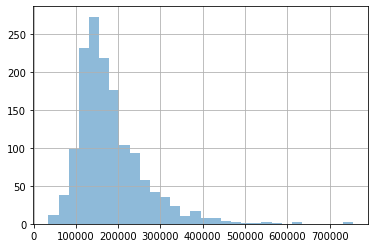

In [3]:
import matplotlib.pyplot as plt

# Plot a Histogram
housing_train.SalePrice.hist(bins=30, alpha=0.5)
plt.show()

### It's a Regression Problem for a Continuous Variable. Let's pick a List of Features in order to Build a XG Boost Model

#### Delete Id Column

In [4]:
del housing_train['Id']

#### Categorical Columns of the Housing Train Dataset

In [5]:
housing_train_categorical_columns = housing_train.select_dtypes(exclude=['int', 'float']).columns.to_list()
print(housing_train_categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Numerical Columns of the Housing Train Dataset

In [6]:
housing_train_numerical_columns = housing_train.select_dtypes(include=['int', 'float']).columns.to_list()
del housing_train_numerical_columns[-1]
del housing_train_numerical_columns[0]
print(housing_train_numerical_columns)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### Exploratory Data Analysis of Numerical Columns

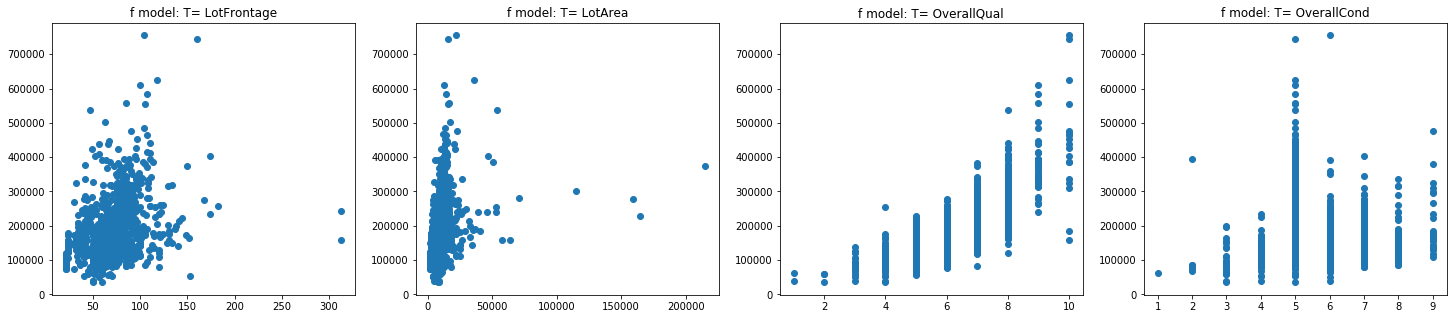

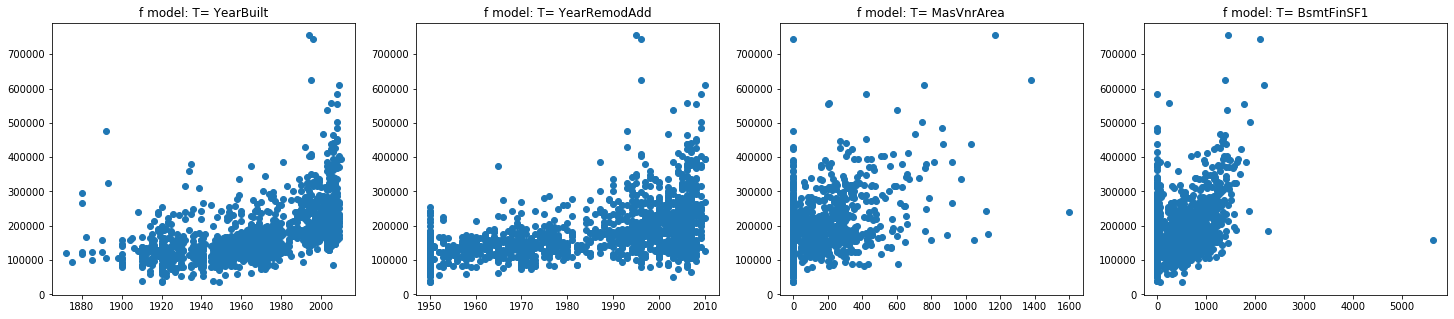

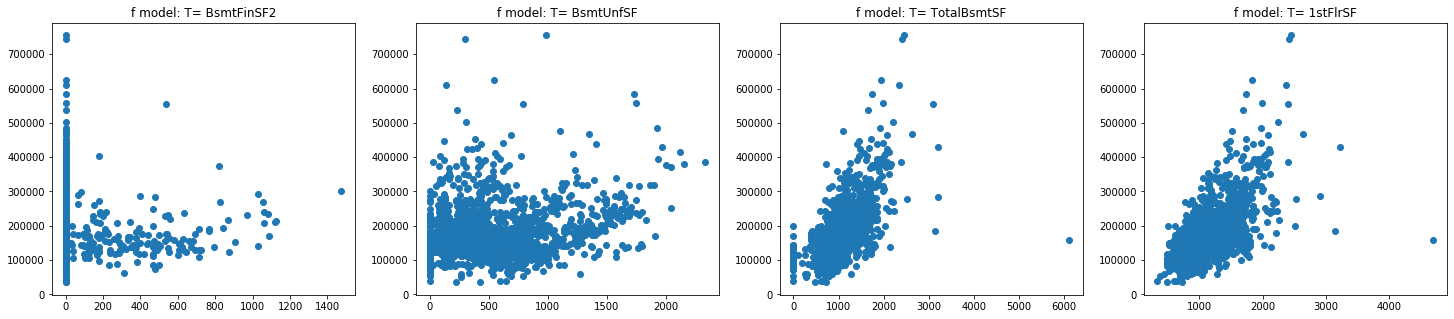

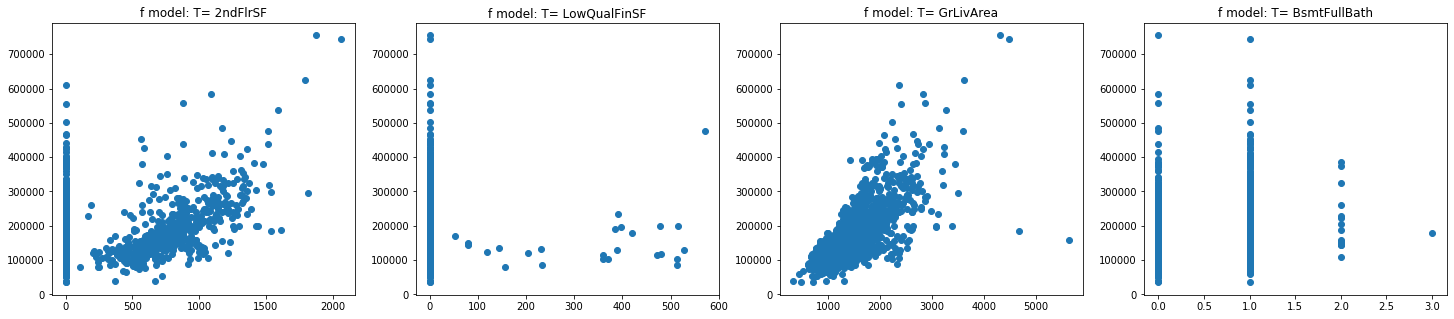

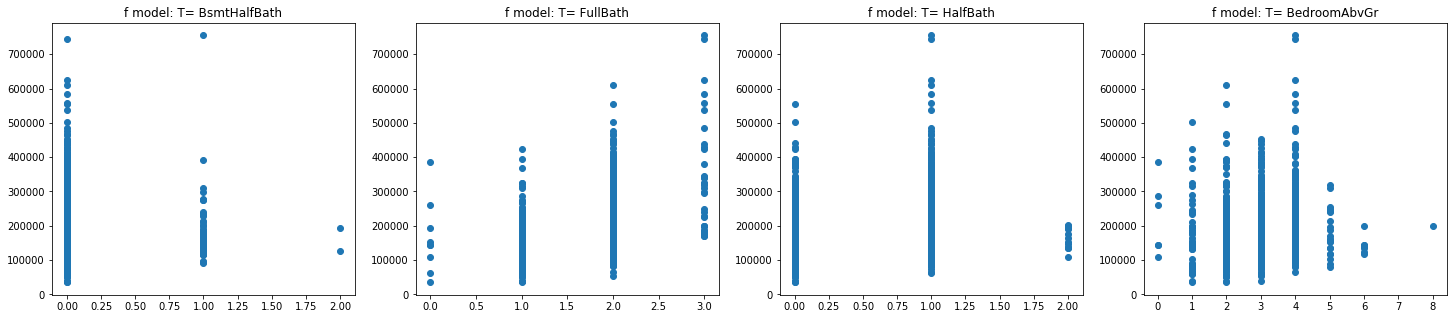

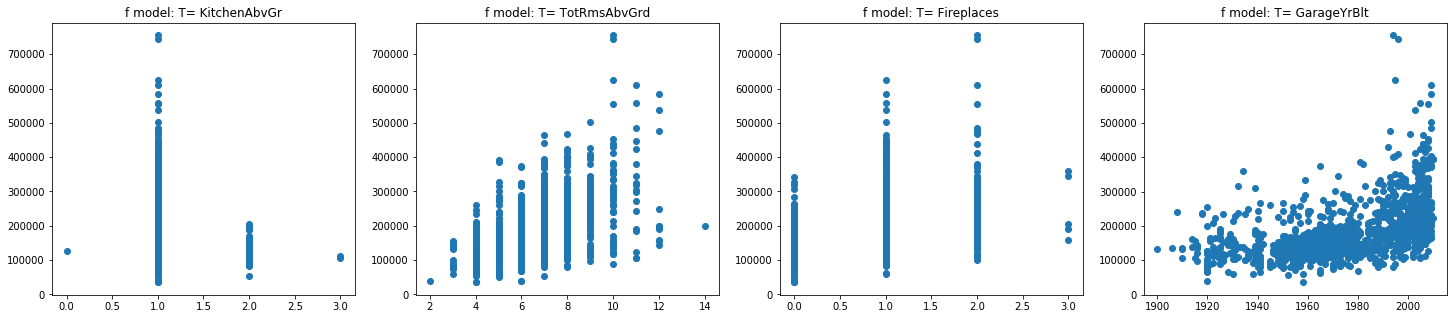

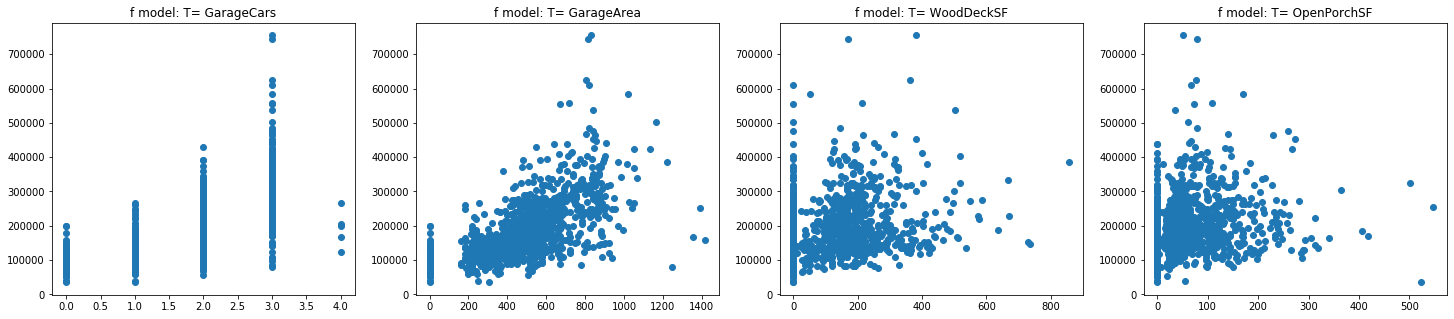

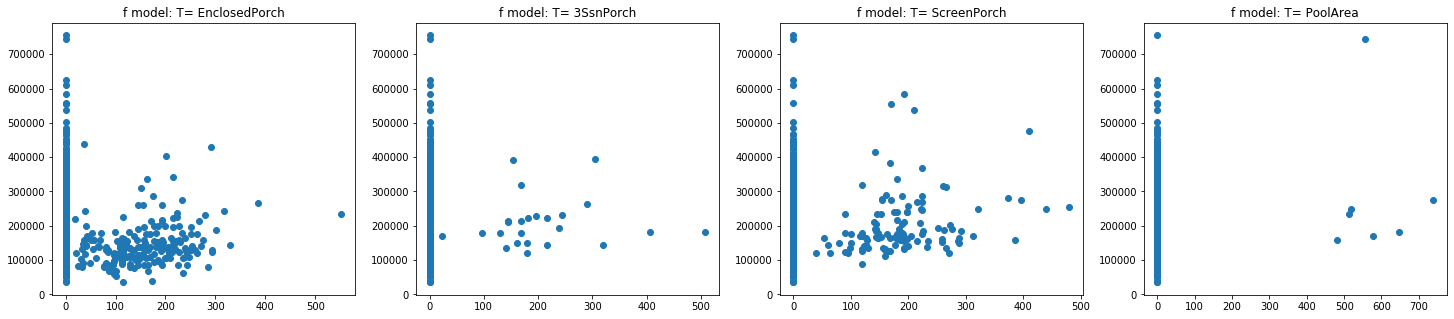

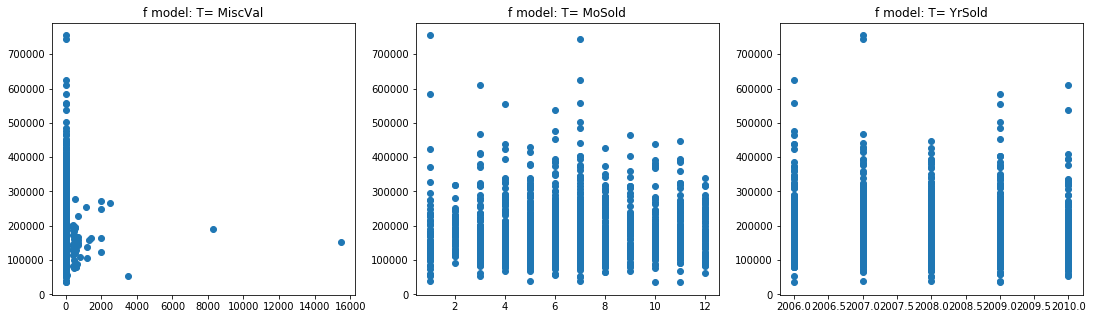

In [7]:
vars = housing_train[housing_train_numerical_columns].columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = housing_train['SalePrice']
for var in vars:
    x = housing_train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

In [8]:
def scatter_plot_for_numerical_column(housing_train_numerical_column): 
        print("Description of " + str(housing_train_numerical_column))
        print(housing_train[housing_train_numerical_column].describe())
        print("\n")

In [9]:
for i in housing_train_numerical_columns:
    print("Description of the numerical Column: " + str(i))
    scatter_plot_for_numerical_column(i)

Description of the numerical Column: LotFrontage
Description of LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


Description of the numerical Column: LotArea
Description of LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


Description of the numerical Column: OverallQual
Description of OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


Description of the numerical Column: OverallCond
Description of OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000



Description of the numerical Column: YrSold
Description of YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64




### Exploratory Analysis of the Numerical Columns

#### Lot Frontage: As per the plot, there seems a positive correlation to the Sales Price
#### Lot Area: As per the plot, there seems a positive correlation to the Sales Price
#### Overall Quality: As per the plot, there seems a positive correlation to the Sales Price
#### Overall Condition: As per the plot, a correlation to the Sales Price is Not seen. Need further investigation
#### Year Built: As per the plot, newer homes are sold for higher prices
#### Year of Remodification: As per the plot, newly modified homes are sold are higher prices
#### MasVnrArea: As per the plot, a correlation to the Sales Price is seen when MasVnrArea is present. A new flag IsMasVnrPresent would be required
#### Basement Finish 1 Square Feet: As per the plot, there seems a positive correlation to the Sales Price, if Basement is present. A new flag IsBasementPresent would be required
#### Basement Finish 2 Square Feet: As per the plot, Data is very less to arrive at any conclusion
#### BsmtUnfSF: It looks like there is a correlation. Needs further investigation
#### TotalBsmtSF: There is a strong correlation to the Sales Price
#### 1st Floor Square Feet: There is a strong correlation to the Sales Price
#### 2nd Floor Square Feet: There is positive correlation if 2nd floor is present. A new flag Is2ndFloorPresent would be required
#### LowQualFinSF: Most of the data has 0 value. This feature can be ignored
#### Ground Living Area: There is strong correlation to the Sales Price
#### BsmtFullBath: No correlation is seen to the Sales Price
#### BsmtHalfBath: No correlation is seen to the Sales Price
#### FullBath: There seems a correlation to the Sales Price
#### HalfBath: No correlation is seen
#### BedroomAbvGr: A correlation can be seen till the Bedroom reaches 4
#### KitchenAbvGr: A correlation is not seen to the Sales Price
#### TotRmsAbvGrd: There is a positive correlation to the Sales Price
#### Fireplaces: Some correlation can be seen. Needs further investigation
#### GarageYrBlt: Newly built Garage have sold for higher prices. This feature could correlate with the YearBuilt. Needs further investigation
#### Garage Cars: The number of Garage cars that can be parked in a garage is having a positive correlation to the Sales Price
#### GarageArea: If Garage is present, then there is a strong correlation seen with respect to the Sales Price. Most of the houses have Garage, and sales prices are not increasing significantly when garage is not present. So, a new flag IsGaragePresent may not be required
#### WoodDeckSF: Some correlation can be seen to the Sales price when Wood Deck is present. A new flag WoodDeckPresent would be required
#### OpenPorchSF: There is a positive correlation to the Sales Price. A new flag IsOpenPorchPresent would be required
#### EnclosedPorch: Most of the data have no Enclosed Porch, and when it's present, there seems like no strong correlation
#### 3SsnPorch: Most of the data has no 3SsnPorch value. This feature can be ignored
#### ScreenPorch: Most of the data has no ScreenPorch value. This feature can be ignored
#### PoolArea: Most of the data has no PoolArea value. This feature can be ignored
#### MiscVal: Most of the data has no MiscVal value. This feature can be ignored
#### Month Sold: Needs further investigation, as no visible correlation can be seen, though the data is distributed well across all values
#### Year Sold: Needs further investigation, as no visible correlation can be seen, though the data is distributed well across all values

## Feature Engineering

### Replace Missing Values

#### PoolQC had NaN values. Whenever, PoolArea is 0, PoolQC column had NaN. Replaced NaN with NA - No Pool
#### Alley, Fence, MiscFeature had NaN values. Replaced NaN with NA values
#### FireplaceQu is NaN wherver Fireplaces is 0. Replaced NaN with NA Values - No Fireplace
#### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond is NaN when GaragaeArea is 0. Replaced NaN with NA or 0
#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 are NaN when TotalBsmtSF is 0. Replaced NaN with NA or 0

In [10]:
housing_train['PoolQC'] = housing_train['PoolQC'].replace(np.nan, 'NA')
housing_train['Alley'] = housing_train['Alley'].replace(np.nan, 'NA')
housing_train['Fence'] = housing_train['Fence'].replace(np.nan, 'NA')
housing_train['MiscFeature'] = housing_train['MiscFeature'].replace(np.nan, 'NA')
housing_train['FireplaceQu'] = housing_train['FireplaceQu'].replace(np.nan, 'NA')

housing_train['GarageType'] = housing_train['GarageType'].replace(np.nan, 'NA')
housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].replace(np.nan, 0)
housing_train['GarageFinish'] = housing_train['GarageFinish'].replace(np.nan, 'NA')
housing_train['GarageQual'] = housing_train['GarageQual'].replace(np.nan, 'NA')
housing_train['GarageCond'] = housing_train['GarageCond'].replace(np.nan, 'NA')

housing_train['LotFrontage'] = housing_train['LotFrontage'].replace(np.nan, 0)

housing_train['BsmtQual'] = housing_train['BsmtQual'].replace(np.nan, 'NA')
housing_train['BsmtCond'] = housing_train['BsmtCond'].replace(np.nan, 'NA')
housing_train['BsmtExposure'] = housing_train['BsmtExposure'].replace(np.nan, 'NA')
housing_train['BsmtFinType1'] = housing_train['BsmtFinType1'].replace(np.nan, 'NA')
housing_train['BsmtFinType2'] = housing_train['BsmtFinType2'].replace(np.nan, 'NA')

housing_train['Electrical'] = housing_train['Electrical'].replace(np.nan, 'Other')

housing_train['MasVnrArea'] = housing_train['MasVnrArea'].replace(np.nan, 0)
housing_train['MasVnrType'] = housing_train['MasVnrType'].replace(np.nan, 'None')

#### The GarageYrBlt can't be 0. A suitable value for replacement is the YearBuilt

In [11]:
x = housing_train.loc[housing_train['GarageYrBlt'] == 0]
y = x['YearBuilt']
housing_train.loc[housing_train['GarageYrBlt'] == 0, 'GarageYrBlt'] = y

### Convert Few columns to type int

In [12]:
housing_train["LotFrontage"] = housing_train["LotFrontage"].astype("int")
housing_train["MasVnrArea"] = housing_train["MasVnrArea"].astype("int")
housing_train["GarageYrBlt"] = housing_train["GarageYrBlt"].astype("int")

### Add New Feature such as Difference between LotArea and First Floor Area to get the Garden Area
#### LotArea: Lot size in square feet
#### 1stFlrSF: First Floor square feet
#### GardenArea: Lot size in square feet - First Floor square feet


In [13]:
housing_train["GardenArea"] = housing_train["LotArea"] - housing_train["1stFlrSF"]

### Identify Strong Correlations

#### LotArea and GardenArea are Strongly Positively Correlated - 0.999302
#### PoolArea and PoolQC are strongly Negatively Correlated - -0.884250
#### GarageCars and GarageArea are strongly Positively Correlated - 0.882475
#### YearBlt and GarageYrBlt are strongly Positively Correlated - 0.845141
#### Exterior1st and Exterior2nd are strongly Positively Correlated - 0.854163
#### TotRmsAbvGrd and GrLivArea are strongly Positively Correlated - 0.825489
#### BldgType and MSSubClass are quite Positively Correlated - 0.746063  
#### OverallQual and SalesPrice are quite Positively Correlated - 0.790982  
#### GrLivArea and and SalesPrice are quite Positively Correlated - 0.708624  
#### BsmtFinType2 and BsmtFinSF2 are quite Negatively Correlated -  -0.706303

In [14]:
del(housing_train["LotArea"])
del(housing_train["PoolArea"])
del(housing_train["GarageArea"])
del(housing_train["GarageYrBlt"])
del(housing_train["Exterior2nd"])
del(housing_train["GrLivArea"])
del(housing_train["BldgType"])
del(housing_train["BsmtFinSF2"])

### 1stFlrSF and TotalBsmtSF are strongly Positively Correlated - 0.819530 
### Create the Flags

In [15]:
housing_train['Is_Basement'] = np.where(housing_train['TotalBsmtSF']>0, 1, 0)
del(housing_train["TotalBsmtSF"])

In [16]:
housing_train['IsMasVnrPresent'] = np.where(housing_train['MasVnrArea']>0, 1, 0)

In [17]:
housing_train['IsMasVnrPresent'] = np.where(housing_train['BsmtFinSF1']>0, 1, 0)

In [18]:
housing_train['Is2ndFloorPresent'] = np.where(housing_train['2ndFlrSF']>0, 1, 0)

In [19]:
housing_train['IsWoodDeckPresent'] = np.where(housing_train['WoodDeckSF']>0, 1, 0)

In [20]:
housing_train['IsOpenPorchPresent'] = np.where(housing_train['OpenPorchSF']>0, 1, 0)

### Exploratory Analysis for the Categorical Columns

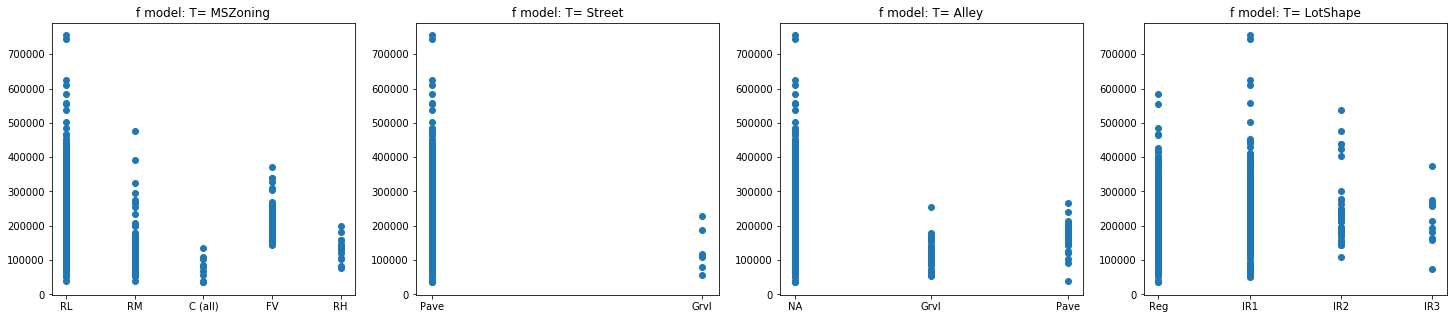

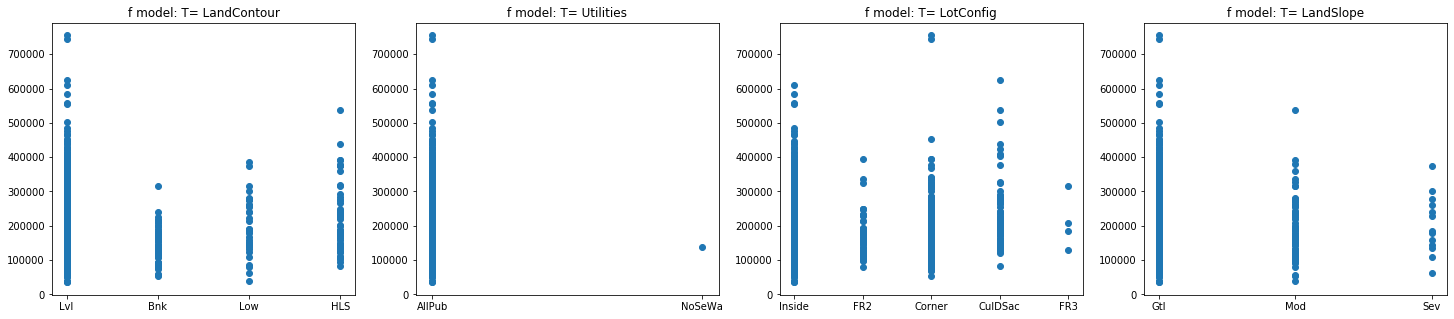

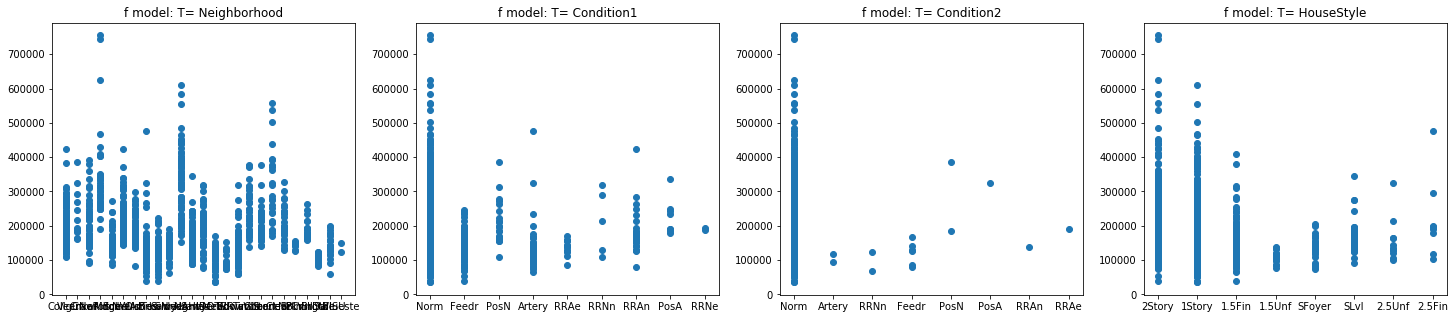

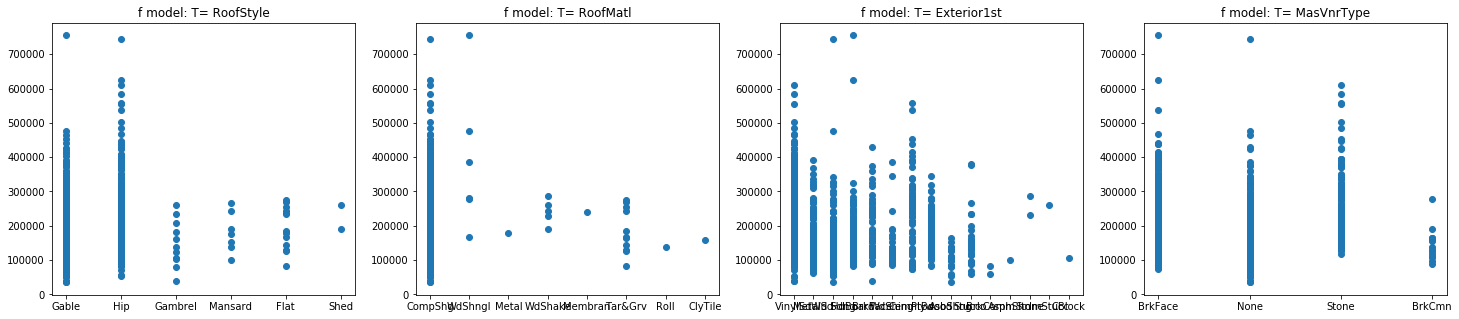

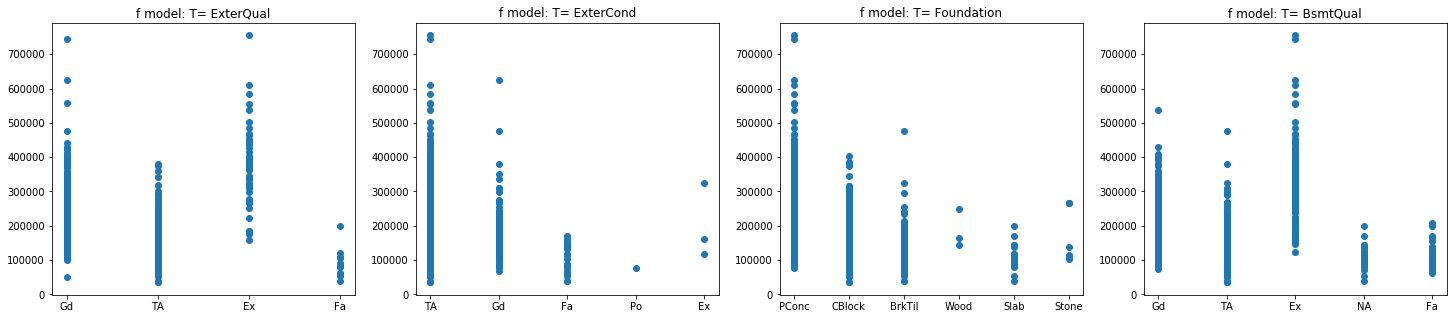

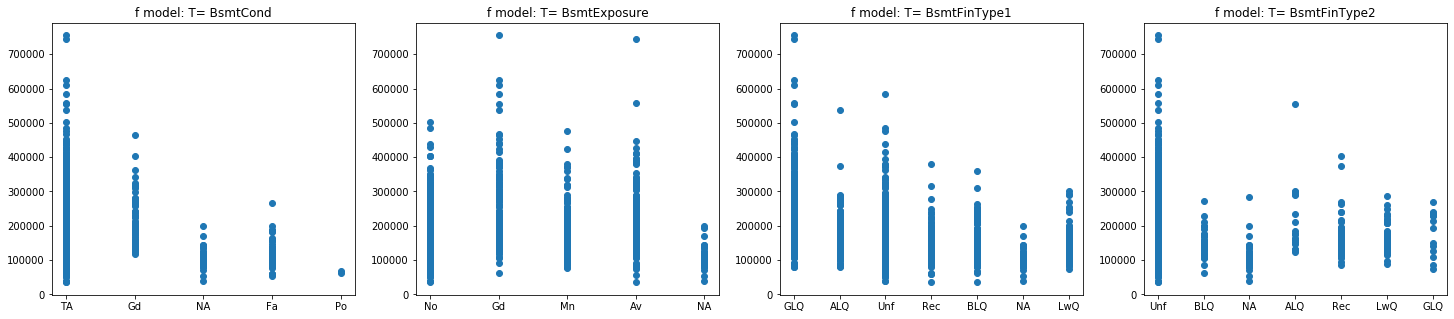

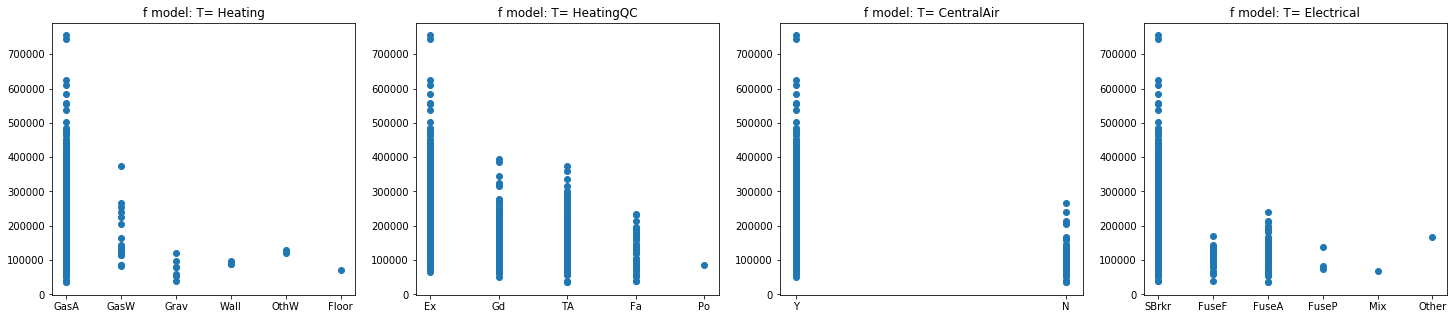

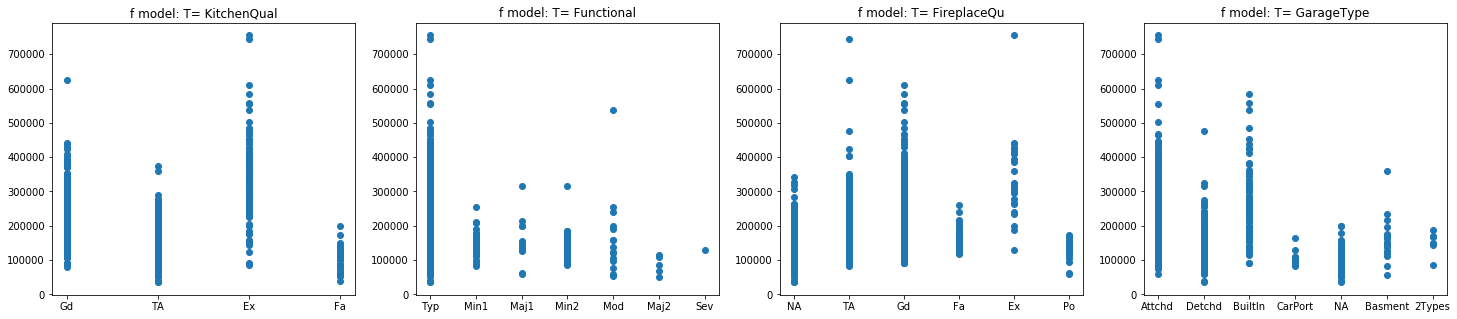

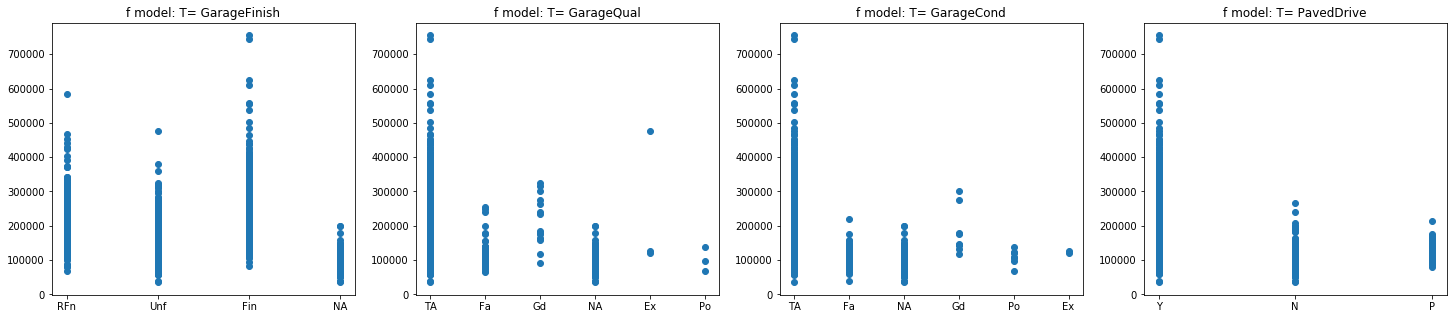

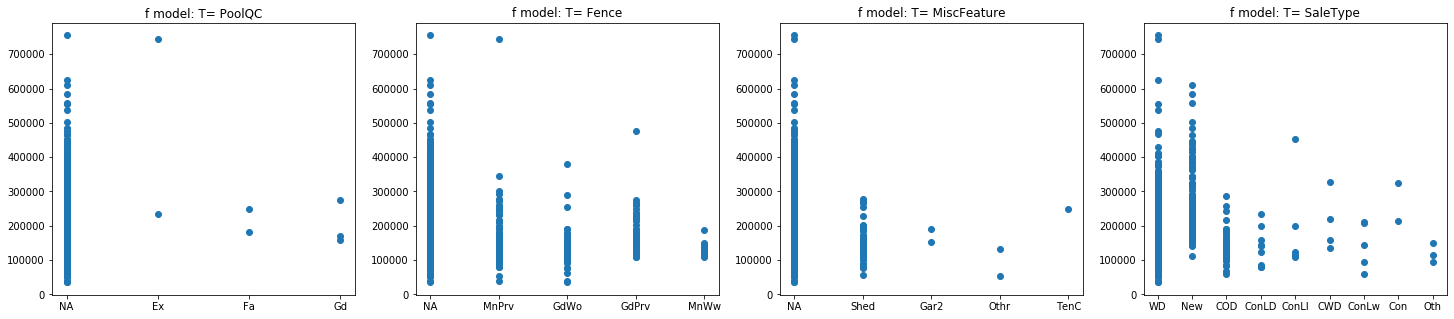

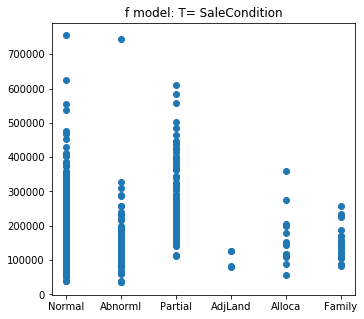

In [21]:
vars = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 
 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 
 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# vars = numerical_features
figures_per_time = 4
count = 0 
y = housing_train['SalePrice']
for var in vars:
    x = housing_train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

In [23]:
def description_for_categorical_column(housing_train_categorical_column):
    #plt.style.use('ggplot')

    # Find the Median Sales Price by the Categorical Variable
    sales_price_per_category = housing_train.groupby(housing_train_categorical_column, as_index=False)['SalePrice'].median()

    print("Description of " + str(housing_train_categorical_column))
    print(housing_train[housing_train_categorical_column].describe())

    print("\n")
    
    print("Value Counts of " + str(housing_train_categorical_column))
    print(housing_train[housing_train_categorical_column].value_counts())

    print("\n")

    print("Median SalesPrice per " + str(housing_train_categorical_column))
    print(sales_price_per_category)

    # Draw a Bar Plot
    #fig = plt.figure(figsize=(5,4))
    #plt.bar(sales_price_per_category[housing_train_categorical_column], sales_price_per_category.SalePrice)

    # Set Titles
    #plt.xlabel(housing_train_categorical_column)
    #plt.ylabel("Median SalesPrice")
    #plt.title("Median SalesPrice Across " + str(housing_train_categorical_column))

    # Show plot
    #plt.show()

### Description of the Categorical Columns

In [24]:
for i in vars:
    print("********************************************************")
    print("Description of the Category Columns: " + str(i))
    description_for_categorical_column(i)
    print("\n")

********************************************************
Description of the Category Columns: MSZoning
Description of MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


Value Counts of MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Median SalesPrice per MSZoning
  MSZoning  SalePrice
0  C (all)      74700
1       FV     205950
2       RH     136500
3       RL     174000
4       RM     120500


********************************************************
Description of the Category Columns: Street
Description of Street
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object


Value Counts of Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


Median SalesPrice per Street
  Street  SalePrice
0   Grvl     114250
1   Pave     163000


********************************************************
Description of the Category Columns: Alle

Description of Exterior1st
count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object


Value Counts of Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64


Median SalesPrice per Exterior1st
   Exterior1st  SalePrice
0      AsbShng   108000.0
1      AsphShn   100000.0
2      BrkComm    71000.0
3      BrkFace   165750.0
4       CBlock   105000.0
5      CemntBd   236500.0
6      HdBoard   149900.0
7      ImStucc   262000.0
8      MetalSd   139000.0
9      Plywood   167450.0
10       Stone   258500.0
11      Stucco   144000.0
12     VinylSd   200000.0
13     Wd Sdng   138943.5
14     WdShing   128700.0


********************************************************
Description of the Category Columns: MasVnrType
Description of MasVnrT

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


Median SalesPrice per SaleCondition
  SaleCondition  SalePrice
0       Abnorml     130000
1       AdjLand     104000
2        Alloca     148145
3        Family     140500
4        Normal     160000
5       Partial     244600




### Analysis of the Categorical Columns

#### MS Zoning: The Sales Price varies with different MS Zoning values. This feature could be affecting the Sales Price
#### Street: The count of the Gravel is very less. If this variable doesn't directly affects the Sales Price, then these rows can be removed in order to prevent overfitting
#### Alley: The count is very less. The empty rows have to be replaced with NA value. This value may not be affecting the Sales Price
#### Lot Shape: Further investigation is needed, since there is a variation of Sales Price observed with varying lot shapes
#### Land Contour: Further investigation is required as the count of Lvl itself is ubiquitous
#### Utilities: The NoSeWa count is just 1. So, this data can be removed if it doesn't significantly affects the sales price
#### Lot Config: 'Inside' value has the highest count. More investigation is required if Sales Price differs with different lot config combinations
#### Land Slope: Though 'Gtl' count is more, its median price is lesser when compared to 'Mod' or 'Sev'. Needs further investigation
#### Neighborhood: By instinct, Neighborhood should be a very important feature for predicting the House Price
#### Condition 1: Need more investigation if this feature is required
#### Condition 2: The count of the Norm value is highest. Need more investigation to decide to keep this feature or not
#### Building Type: This features seems an important parameter for predicting the sales price
#### House Style: House Style should be an important parameter for predicting the sales price
#### Roof Style: The distribution of 'Gable' has the highest count. More investigation is required if Sales Price differs with different lot config combinations
#### Roof Material: CompShg is of the highest count. More investigation is required if Sales Price differs with different lot config combinations
#### Exterior 1st: The median sales price is distributed across all the Exterior1st values
#### Exterior 2nd: The median sales price is distributed across all the Exterior2nd values
#### Mason Vnr Type: This categorical variable seems like affecting the sales price
#### Exterior Quality: This categorical variable seems like affecting the sales price
#### External Condition: Needs more investigation as the count of TA is more
#### Foundation: This categorical variable seems like affecting the sales price
#### Basement Quality: This categorical variable seems like affecting the sales price
#### Basement Condition: The count of TA is more. Needs more investigation
#### Basement Exposure: This categorical variable seems like affecting the sales price
#### Basement Finish Type 1: This categorical variable seems like affecting the sales price
#### Basement Finish Type 2: The count of Unf is more. Needs more investigation
#### Heating Type: The count of GasA is more. Needs more investigation
#### Heating Quality: This categorical variable seems like affecting the sales price
#### Central Air: This categorical variable seems like affecting the sales price
#### Electrical: The coutn of SBrkr value is more, and the Median Sales price is also higher. This feature should be an important one
#### Kitchen Quality: This categorical variable seems like affecting the sales price
#### Functional: The count of Typ is more. Needs more ivestigation
#### Fire Place Quality: This categorical variable seems like affecting the sales price
#### Garage Type: This categorical variable seems like affecting the sales price
#### Garage Finish: This categorical variable seems like affecting the sales price
#### Garage Quality: Surprisingly, this categorical variable doesn't seem like affecting the sales price
#### Garage Condition: Surprisngly, this categorical variable doesn't seem like affecting the sales price
#### Paved Drive: This categorical variable seems like affecting the sales price
#### Pool Quality: This categorical variable seems like affecting the sales price, if there is a pool!
#### Fence: This categorical variable seems like affecting the sales price
#### Miscellaneous Feature: This categorical variable doesn't seem like affecting the sales price
#### Sale Type: Needs more investigation
#### Sale Condition: This categorical variable seems like affecting the sales price

### Identifying the Skewness

In [25]:
from scipy.stats import skew

skew_housing_train = housing_train.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_housing_train_df = pd.DataFrame({'Skew':skew_housing_train})
skewed_housing_train_df = skew_housing_train_df[(skew_housing_train_df['Skew']>0.5)|(skew_housing_train_df['Skew']<-0.5)]

In [26]:
skewed_housing_train_df.index

Index(['MiscVal', 'GardenArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr',
       'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea',
       'OpenPorchSF', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'MSSubClass',
       '1stFlrSF', 'BsmtUnfSF', '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd',
       'HalfBath', 'Fireplaces', 'BsmtFullBath', 'YearRemodAdd', 'YearBuilt',
       'IsMasVnrPresent', 'Is_Basement'],
      dtype='object')

In [27]:
from scipy.special import boxcox1p

val=0.1
for col in ('MiscVal', 'GardenArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr',
       'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea',
       'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'MSSubClass',
       '1stFlrSF', 'BsmtUnfSF', '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd',
       'HalfBath', 'Fireplaces', 'BsmtFullBath', 'YearRemodAdd', 'YearBuilt',
       'IsMasVnrPresent', 'Is_Basement'):
    housing_train[col]=boxcox1p(housing_train[col], val)

### Log Transformation of the Sales Price

In [28]:
housing_train['SalePrice']=np.log(housing_train['SalePrice'])

### Preliminary Analysis to identify important Features in Numerical Columns: Lasso is not giving the proper information on the important features

[ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0.
  0.  0.  0.  0. -0.  0.  0. -0.  0. -0.]


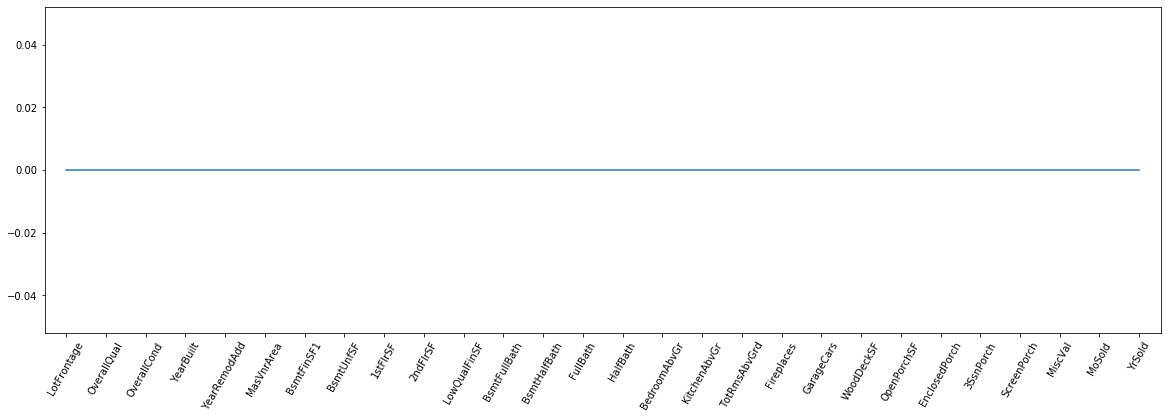

In [29]:
# Import Lasso
from sklearn.linear_model import Lasso

numerical_columns = ['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                     'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 
                     '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                     'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                     'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']

names = housing_train[numerical_columns].columns
feature_list = names.tolist()

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(housing_train[numerical_columns], housing_train['SalePrice'])

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
fig = plt.figure(figsize=(20,6))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names.values, rotation=60)
plt.margins(0.02)
plt.show()

### Label Encoding

In [30]:
from sklearn import preprocessing

# Set up the LabelEncoder object
enc = preprocessing.LabelEncoder()

# Apply the encoding to the Categorical column
housing_train['MSZoning'] = enc.fit_transform(housing_train['MSZoning'])
housing_train['Street'] = enc.fit_transform(housing_train['Street'])
housing_train['Alley'] = enc.fit_transform(housing_train['Alley'])
housing_train['LotShape'] = enc.fit_transform(housing_train['LotShape'])
housing_train['LandContour'] = enc.fit_transform(housing_train['LandContour'])
housing_train['Utilities'] = enc.fit_transform(housing_train['Utilities'])
housing_train['LotConfig'] = enc.fit_transform(housing_train['LotConfig'])
housing_train['LandSlope'] = enc.fit_transform(housing_train['LandSlope'])
housing_train['Neighborhood'] = enc.fit_transform(housing_train['Neighborhood'])
housing_train['Condition1'] = enc.fit_transform(housing_train['Condition1'])
housing_train['Condition2'] = enc.fit_transform(housing_train['Condition2'])
housing_train['HouseStyle'] = enc.fit_transform(housing_train['HouseStyle'])
housing_train['RoofStyle'] = enc.fit_transform(housing_train['RoofStyle'])
housing_train['RoofMatl'] = enc.fit_transform(housing_train['RoofMatl'])
housing_train['Exterior1st'] = enc.fit_transform(housing_train['Exterior1st'])
housing_train['MasVnrType'] = enc.fit_transform(housing_train['MasVnrType'])
housing_train['ExterQual'] = enc.fit_transform(housing_train['ExterQual'])
housing_train['ExterCond'] = enc.fit_transform(housing_train['ExterCond'])
housing_train['Foundation'] = enc.fit_transform(housing_train['Foundation'])
housing_train['BsmtQual'] = enc.fit_transform(housing_train['BsmtQual'])
housing_train['BsmtCond'] = enc.fit_transform(housing_train['BsmtCond'])
housing_train['BsmtExposure'] = enc.fit_transform(housing_train['BsmtExposure'])
housing_train['BsmtFinType1'] = enc.fit_transform(housing_train['BsmtFinType1'])
housing_train['BsmtFinType2'] = enc.fit_transform(housing_train['BsmtFinType2'])
housing_train['Heating'] = enc.fit_transform(housing_train['Heating'])
housing_train['HeatingQC'] = enc.fit_transform(housing_train['HeatingQC'])
housing_train['Electrical'] = enc.fit_transform(housing_train['Electrical'])
housing_train['KitchenQual'] = enc.fit_transform(housing_train['KitchenQual'])
housing_train['Functional'] = enc.fit_transform(housing_train['Functional'])
housing_train['FireplaceQu'] = enc.fit_transform(housing_train['FireplaceQu'])
housing_train['GarageType'] = enc.fit_transform(housing_train['GarageType'])
housing_train['GarageFinish'] = enc.fit_transform(housing_train['GarageFinish'])
housing_train['GarageQual'] = enc.fit_transform(housing_train['GarageQual'])
housing_train['GarageCond'] = enc.fit_transform(housing_train['GarageCond'])
housing_train['PavedDrive'] = enc.fit_transform(housing_train['PavedDrive'])
housing_train['PoolQC'] = enc.fit_transform(housing_train['PoolQC'])
housing_train['Fence'] = enc.fit_transform(housing_train['Fence'])
housing_train['MiscFeature'] = enc.fit_transform(housing_train['MiscFeature'])
housing_train['SaleType'] = enc.fit_transform(housing_train['SaleType'])
housing_train['SaleCondition'] = enc.fit_transform(housing_train['SaleCondition'])
housing_train['CentralAir'] = enc.fit_transform(housing_train['CentralAir'])

# Print the columns names
print(housing_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence',
       'MiscFeature', 'Mis

### List of Features for the XG Boost Model

In [31]:
housing_train_updated_features_list_for_regression = housing_train.drop("SalePrice", axis=1).columns.to_list()
print(housing_train_updated_features_list_for_regression)

['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GardenArea', 'Is_Basement', 'IsMasVnrPre

### Verifying if All NaN values are removed

Text(0.5, 1.0, 'Features v/s Null Count')

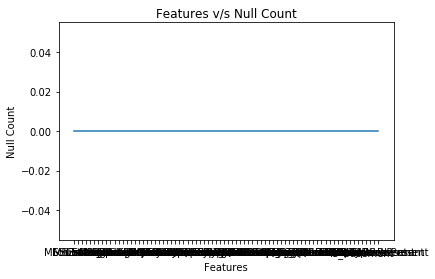

In [32]:
x = []
Y = []
for i in housing_train_updated_features_list_for_regression:
    x.append(i)
    Y.append(housing_train[i].isnull().sum())
    
plt.plot(x, Y)
plt.xlabel('Features')
plt.ylabel('Null Count')
plt.title('Features v/s Null Count')

## Local Validation - Get the Holdout Set -  Split Train Data into Train Set and Holdout Set

In [33]:
from sklearn.model_selection import train_test_split
housing_train_subset, housing_train_test_subset = train_test_split(housing_train, test_size=0.3, random_state=42)

## Competition Metric: Identify the Regression Metrics - Root Mean Squared Error (RMSE) and Root Mean Squared Log Error (RMSLE)

In [34]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_test, y_pred):
      return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

## XGBoost - Gradient Boosting Model

In [35]:
import xgboost as xgb

# Plot the feature importances
def plot_feature_importance(X_train, y_train, X_test, y_test, max_depth=20):
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
    
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    
    # Train xgboost model
    xg_depth = xgb.train(params=params, dtrain=dtrain)
    
    fig, ax = plt.subplots(figsize=(10, 20))
    xgb.plot_importance(xg_depth, ax=ax)
    plt.show()

#### Plot Feature Importance for Max_Depth=20

/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


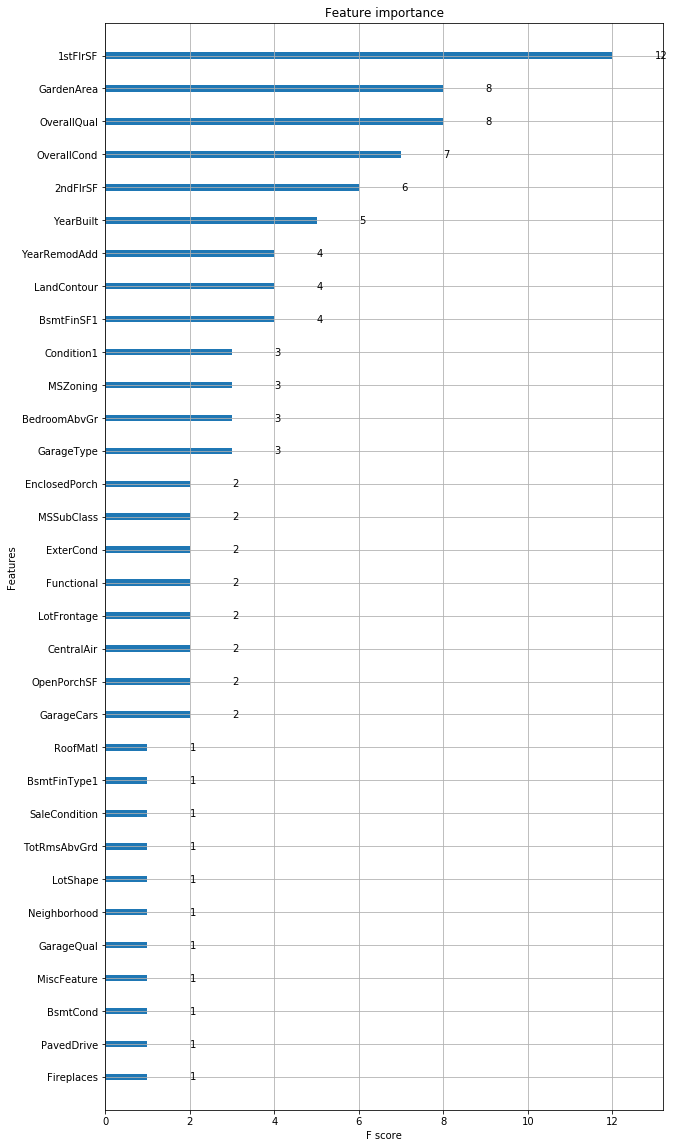

In [36]:
plot_feature_importance(housing_train_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_subset['SalePrice'],
                                        housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_test_subset['SalePrice'],
                                        20
                                       )

#### Plot Feature Importance for Max_Depth=30

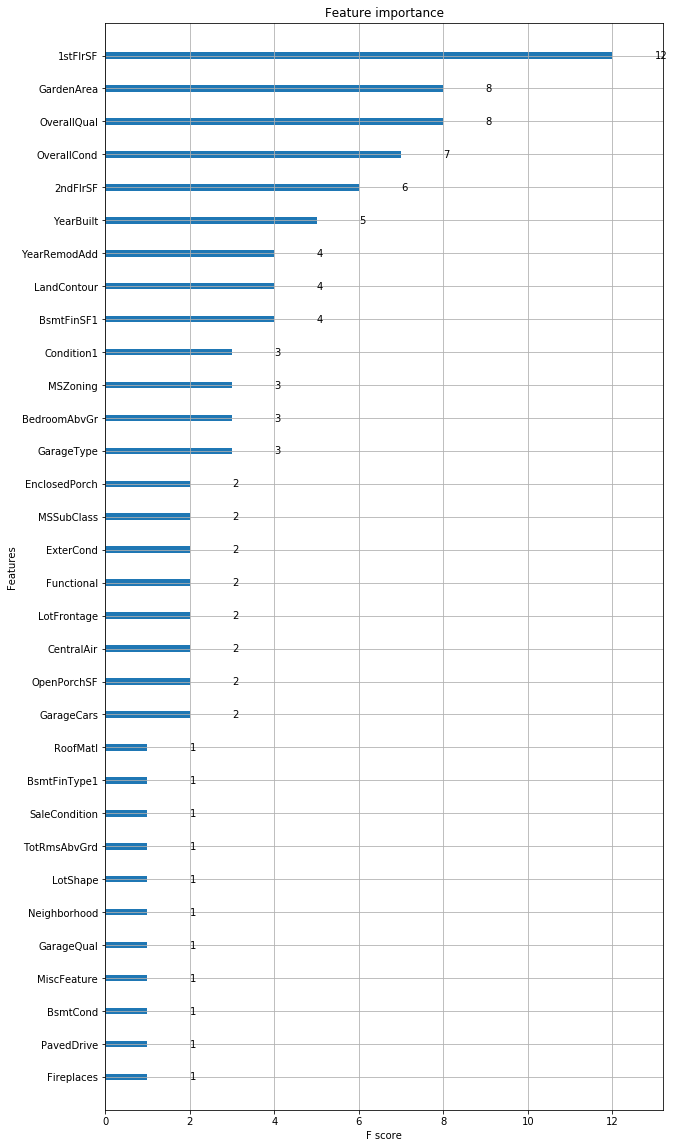

In [37]:
plot_feature_importance(housing_train_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_subset['SalePrice'],
                                        housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_test_subset['SalePrice'],
                                        40
                                       )

#### Plot Feature Importance for Max_Depth=45

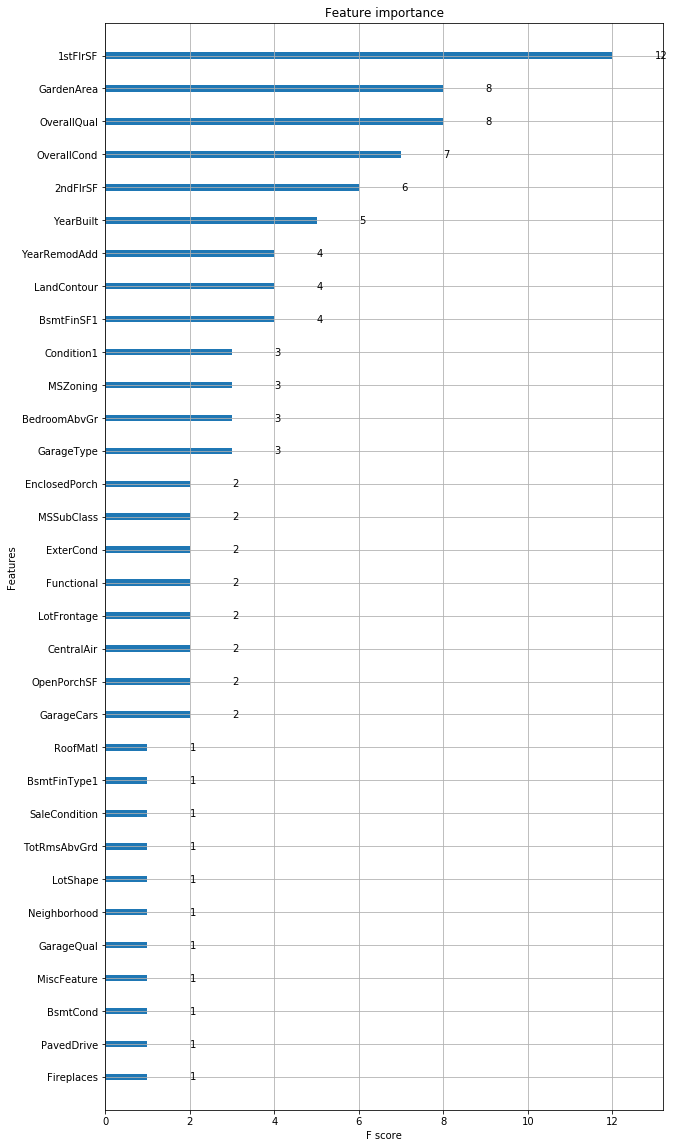

In [38]:
plot_feature_importance(housing_train_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_subset['SalePrice'],
                                        housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                        housing_train_test_subset['SalePrice'],
                                        45
                                       )

#### Picking up the Features with Highest Importance as per the Feature Importance Plot. But for now, keeping other parameters just to see the difference in RMSE with the removal of each features. If the RMSE is not increased due to the removal of a feature, then that feature is kept for the model.

In [39]:
housing_train_updated_features_list_for_regression = [
    'MSZoning', 'LotFrontage', 
    'LotShape', 'LandContour', 'LotConfig', 
    'LandSlope', 'Neighborhood', 
    'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 
    'YearRemodAdd', 'RoofStyle', 'Exterior1st', 
    'MasVnrType', 'ExterQual', 'ExterCond', 
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 
    'Heating', 'Electrical', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenQual', 'TotRmsAbvGrd', 'Functional', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageCars', 'GarageQual', 'GarageCond', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'MiscFeature',
    'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 
    'GardenArea', 'Is_Basement']

### Hyperparameter Tuning and Model Validation

#### Define XGBoost Model

In [40]:
from sklearn.model_selection import RandomizedSearchCV

def random_search(X_train, y_train, X_test, y_test):
    # Create the parameter grid: gbm_param_grid 
    gbm_param_grid = {
        'n_estimators': [5, 10, 20, 25, 30, 35, 40, 45, 50],
        'max_depth': range(5, 60)
    }

    # Instantiate the regressor: gbm
    gbm = xgb.XGBRegressor(n_estimators=10)

    # Perform random search: grid_mse
    randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                        n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
    randomized_mse.fit(X_train, y_train)

    # Print the best parameters and lowest RMSE
    print("Best parameters found: ",randomized_mse.best_params_)
    print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

#### Random Search: As per the analysis of the Random Search, let's pick up max_depth as 21 or little more

In [41]:
random_search(housing_train_subset[ housing_train_updated_features_list_for_regression], 
                                    housing_train_subset['SalePrice'],
                                    housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                    housing_train_test_subset['SalePrice'])

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[20:24:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and wi

Best parameters found:  {'n_estimators': 50, 'max_depth': 21}
Lowest RMSE found:  0.17112013934806394


In [42]:
def run_xboost_regression_model(X_train, y_train, X_test, y_test, max_depth, lambda_val=1):
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
   
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    params["lambda"] = lambda_val
    params["booster"] = 'gblinear'
    params["colsample_bytree"] = 0.3
    params["learning_rate"] = 0.1
   
     # Train xgboost model
    xg_depth = xgb.train(params=params, dtrain=dtrain)
    
    dtrain = xgb.DMatrix(data=X_train)
    dtest = xgb.DMatrix(data=X_test)
    
    # Make predictions
    train_pred = xg_depth.predict(dtrain)     
    test_pred = xg_depth.predict(dtest)

    # Calculate metrics
    mse_train = rmse(y_train, train_pred)
    mse_test = rmse(y_test, test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

    msle_train = rmsle(y_train, train_pred)
    msle_test = rmsle(y_test, test_pred)
    print('MSLE Train: {:.6f}. MSLE Test: {:.6f}'.format(msle_train, msle_test))    

#### Run Model with different Max_Depth Hyperparameter: There are no changes in Mean Square Error observed for higher Max Depths. So, choosing Max_Depth of 30

In [43]:
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45]:
    print("*********************************************")
    print("Run XG Boost Model with Max_Depth: " + str(i))
    run_xboost_regression_model(housing_train_subset[housing_train_updated_features_list_for_regression], 
                                housing_train_subset['SalePrice'],
                                housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                housing_train_test_subset['SalePrice'],
                                i)
    print("\n")

*********************************************
Run XG Boost Model with Max_Depth: 5
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 10
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 15
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 20
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 25
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 30
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*****************************

/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, '

MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 40
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374


*********************************************
Run XG Boost Model with Max_Depth: 45
MSE Train: 0.746. MSE Test: 0.652
MSLE Train: 0.058454. MSLE Test: 0.050374




/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


#### Define and Run Cross Validation

In [44]:
def run_cross_val_xboost_regression_model(X_train, y_train, X_test, y_test, max_depth=20):
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
   
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    params["booster"] = 'gblinear'
    params["colsample_bytree"] = 0.3
    params["learning_rate"] = 0.1
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=dtrain, 
                        params=params, 
                        nfold=4, 
                        num_boost_round=5, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)

    # Print cv_results
    print(cv_results)
    
    # Extract and print final round boosting round metric
    print((cv_results["test-rmse-mean"]).tail(1))

In [45]:
run_cross_val_xboost_regression_model(housing_train_subset[housing_train_updated_features_list_for_regression], 
                                      housing_train_subset['SalePrice'],
                                      housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                                      housing_train_test_subset['SalePrice'],
                                      30
                                      )

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.963368        0.010771        0.966041       0.041296
1         0.934181        0.010206        0.938651       0.030021
2         0.907027        0.009258        0.912561       0.029579
3         0.881656        0.008319        0.888160       0.029208
4         0.857951        0.007414        0.865346       0.028784
4    0.865346
Name: test-rmse-mean, dtype: float64


/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/manojgr/ml/env/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


#### Try to obtain a proper Alpha and Lambda Hyperparameter out of [1, 10, 100]

In [46]:
def find_best_regression_params(X_train, y_train, X_test, y_test, max_depth=20):
    reg_params = [1, 10, 100]
    
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
   
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    params["booster"] = 'gblinear'
    params["colsample_bytree"] = 0.3
    params["learning_rate"] = 0.1
    
    # Create an empty list for storing rmses as a function of l2 complexity
    rmses_l2 = []

    # Iterate over reg_params
    for reg in reg_params:

        # Update Lambda strength
        params["lambda"] = reg
        params["alpha"] = reg

        # Pass this updated param dictionary into cv
        cv_results_rmse = xgb.cv(dtrain=dtrain, 
                                 params=params, 
                                 nfold=2, 
                                 num_boost_round=5, 
                                 metrics="rmse", 
                                 as_pandas=True, 
                                 seed=123)

        # Append best rmse (final round) to rmses_l2
        rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

        # Look at best rmse per l2 param
        print("Best rmse as a function of l2, for max depth:" + str(max_depth))
        print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

#### The RMSE tend to increase with an increase in Lambda value. Choosing Alpha and Lambda as 1

In [47]:
find_best_regression_params(housing_train_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_subset['SalePrice'],
                            housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_test_subset['SalePrice'],
                            30
                            )

Best rmse as a function of l2, for max depth:30
   l2      rmse
0   1  0.841926
Best rmse as a function of l2, for max depth:30
   l2      rmse
0   1  0.841926
1  10  1.361263
Best rmse as a function of l2, for max depth:30
    l2      rmse
0    1  0.841926
1   10  1.361263
2  100  3.342737


In [48]:
def get_best_boosting_rounds(X_train, y_train, X_test, y_test, max_depth=20):
    # Create list of number of boosting rounds
    #num_rounds = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
    num_rounds = range(5, 201)
    
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
   
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    params["booster"] = 'gblinear'
    params["alpha"] = 1
    params["lambda"] = 1
    params["colsample_bytree"] = 0.3
    params["learning_rate"] = 0.1

    # Empty list to store final round rmse per XGBoost model
    final_rmse = []

    # Iterate over num_rounds and build one model per num_boost_round parameter
    for curr_num_rounds in num_rounds:

        # Perform cross-validation: cv_results
        cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
       
        # Append final round RMSE
        final_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
        
    # Print the resultant DataFrame
    num_rounds_rmses = list(zip(num_rounds, final_rmse))
    
    print("")
    print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds - Max Depth " + str(max_depth),"rmse"]))   

#### The RMSE is reduced after some rounds. So, choosing num_rounds as 155

In [49]:
get_best_boosting_rounds(housing_train_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_subset['SalePrice'],
                            housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_test_subset['SalePrice'],
                            30
                            )


     num_boosting_rounds - Max Depth 30      rmse
0                                     5  0.839400
1                                     6  0.817483
2                                     7  0.797856
3                                     8  0.780275
4                                     9  0.764506
5                                    10  0.750347
6                                    11  0.737579
7                                    12  0.725923
8                                    13  0.715268
9                                    14  0.705500
10                                   15  0.696507
11                                   16  0.688195
12                                   17  0.680478
13                                   18  0.673297
14                                   19  0.666590
15                                   20  0.660305
16                                   21  0.654397
17                                   22  0.648818
18                                   23  0.643547

In [50]:
def perform_cross_validation_early_stopping(X_train, y_train, X_test, y_test, max_depth=30):
    # Create DMatrix on train data
    dtrain = xgb.DMatrix(data=X_train, label=y_train)
   
    # Define xgboost parameters
    params = {'objective': 'reg:linear', 'max_depth': max_depth, 'silent': 1}
    params["booster"] = 'gblinear'
    params["alpha"] = 1
    params["lambda"] = 1
    params["colsample_bytree"] = 0.3
    params["learning_rate"] = 0.1
    num_rounds = 155

    # Perform cross-validation with early stopping: cv_results
    cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3, num_boost_round=num_rounds, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

    # Print cv_results
    print(cv_results)

In [51]:
perform_cross_validation_early_stopping(housing_train_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_subset['SalePrice'],
                            housing_train_test_subset[housing_train_updated_features_list_for_regression], 
                            housing_train_test_subset['SalePrice'],
                            30
                            )

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0           1.041563        0.005218        1.043460       0.042589
1           0.920650        0.005549        0.924419       0.024792
2           0.887197        0.005741        0.891438       0.023594
3           0.859288        0.006061        0.863911       0.023083
4           0.834463        0.006474        0.839400       0.022528
5           0.812293        0.006937        0.817483       0.021915
6           0.792442        0.007392        0.797856       0.021281
7           0.774648        0.007827        0.780275       0.020666
8           0.758692        0.008224        0.764506       0.020077
9           0.744356        0.008587        0.750347       0.019573
10          0.731446        0.008942        0.737579       0.019122
11          0.719696        0.009265        0.725923       0.018712
12          0.708966        0.009539        0.715268       0.018421
13          0.699134        0.009752        0.70

## Conclusion

#### With the above hyperparameters, the XG Boost model has performed quite well for the Train Dataset, without overfitting. The lowest RMSE for the train subset has reached to around 0.329035 and for the test subset of the train dataset has reached to around 0.329952. Now, the next is to do more of feature extraction and addition, build another model - Random Forest, and then proceed to predicting the House Sales Price for the "housing_test" Dataframe, and submit the results to the Kaggle dashboard